Importing libraries

In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset

In [70]:
data = pd.read_csv('/content/drive/MyDrive/Deep Learning/Churn_Modelling.csv')
data.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


Creating dependent and target variables

In [71]:
X = data.iloc[:, 3:13]
y = data.iloc[:, 13]

Categorical features to dummy variables

In [72]:
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [73]:
X = pd.concat([X, geography, gender], axis=1)
X = X.drop(['Geography', 'Gender'], axis=1)

Train Test Split

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Feature Scaling

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Creating the ANN

Importing the libraries

In [76]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

Initializing the ANN

In [77]:
classifier = Sequential()

Adding the input layer and the first first hidden layer

In [78]:
classifier.add(Dense(units = 10, kernel_initializer='he_normal',activation='relu',input_dim = 11))

Drop out Layer

In [79]:
classifier.add(Dropout(0.3))

Adding the second input layer

In [80]:
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu'))

Drop out Layer

In [81]:
classifier.add(Dropout(0.4))

Adding the another input layer

In [82]:
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))

Drop out Layer

In [83]:
classifier.add(Dropout(0.2))

Adding the output layer 

In [84]:
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

Compiling the ANN

In [85]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Fitting ANN to the Train set# 

In [86]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.5979 - accuracy: 0.7606 - val_loss: 0.5160 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5238 - accuracy: 0.7931 - val_loss: 0.4944 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5023 - accuracy: 0.7934 - val_loss: 0.4800 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4911 - accuracy: 0.7966 - val_loss: 0.4727 - val_accuracy: 0.7963
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4787 - accuracy: 0.8001 - val_loss: 0.4572 - val_accuracy: 0.7986
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4714 - accuracy: 0.7987 - val_loss: 0.4524 - val_accuracy: 0.8027
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4633 - accuracy: 0.8003 - val_loss: 0.4486 - val_accuracy: 0.8031

Data in history

In [88]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Summary for history

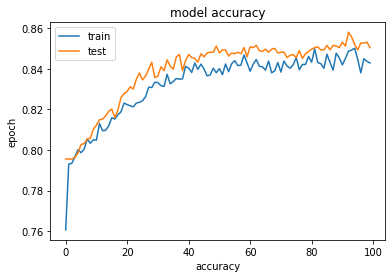

In [89]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Predictions and Model Evaluation

In [91]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

Confusion Matrix

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1539,   56],
       [ 215,  190]])

Accuracy

In [93]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8645